In [1]:
import pickle
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../src')
from portfolio_opt_methods import mv_portfolio

In [35]:
folder = '16. 24.07 | 16-48 | pinnacle-2021-2022-MV'

In [36]:
with open('../conf/analysis.yaml', 'r') as file:
    full_conf = yaml.safe_load(file)

In [37]:
returns_full = pd.read_csv(f'../output-scratch/{folder}/returns.csv')
returns_full['Date'] = pd.to_datetime(returns_full['Date'])  
returns_full.index  = returns_full['Date']
returns_full.drop(columns=['Date'], inplace=True)

In [38]:
with open(f'../output-scratch/{folder}/port_cov.pkl', 'rb') as f:
    port_cov = pickle.load(f)

# returns

In [39]:
period_good = '2021-01-05-2021-12-22'
period_bad = '2021-02-04-2022-01-21'
# period_entire = '2021-01-01-2022-12-31'

period = period_bad

period_start = period[:10]
period_end = period[11:]

print(period_start)
print(period_end)

2021-02-04
2022-01-21


In [40]:
returns = returns_full[returns_full.index >= period_start]
returns = returns[returns.index <= period_end]
Y = returns

In [41]:
Y.shape

(252, 47)

In [42]:
# Y.drop(columns=['EN'], inplace=True)

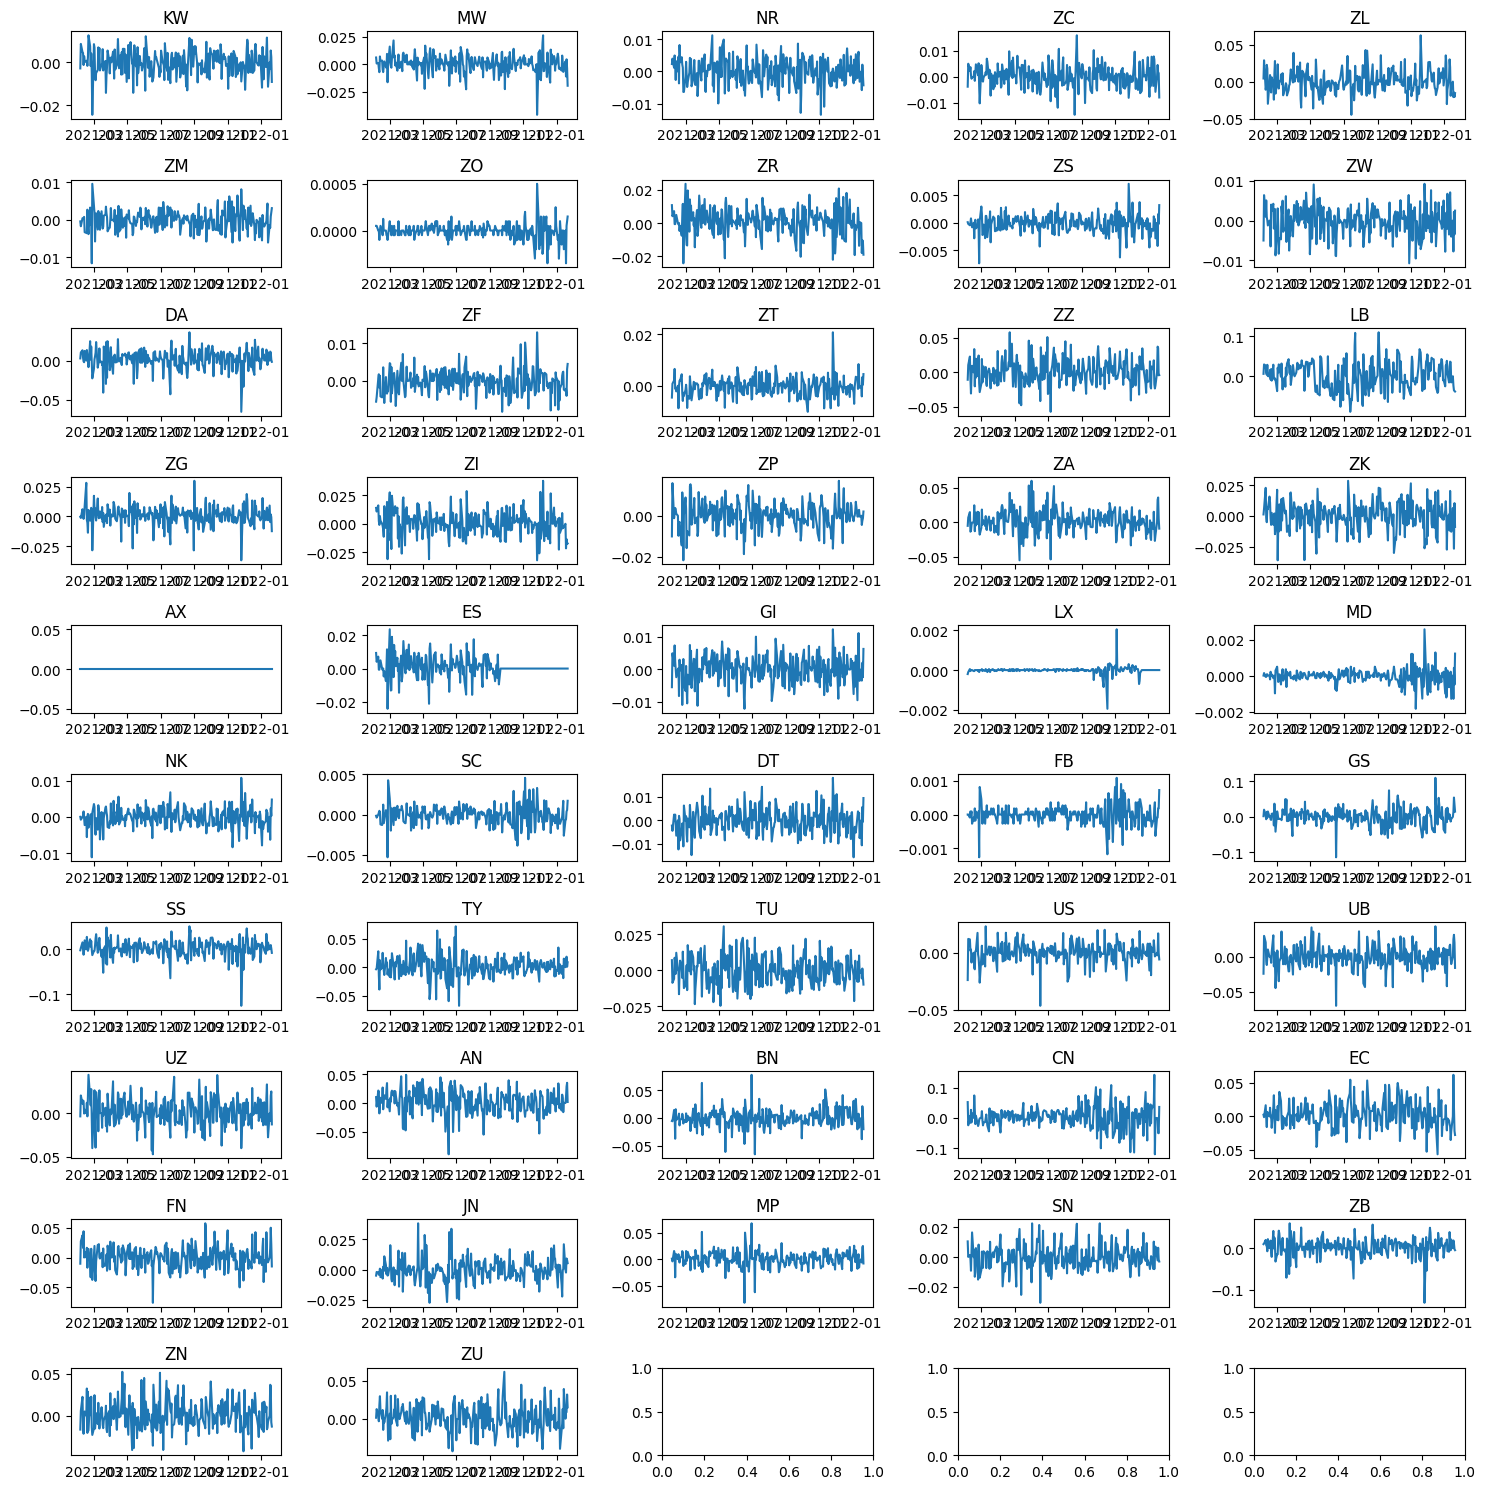

In [43]:
fig, axs = plt.subplots(round(Y.shape[1] / 5) + 1, 5, figsize=(15, 15)) # Creating a 5x5 subplots
axs = axs.ravel() # to iterate over the 5x5 matrix easily

for i in range(Y.shape[1]): # Iterate through each subplot
    axs[i].plot(Y.iloc[:, i]) # Plot the i-th column time series on the i-th subplot
    axs[i].set_title(Y.columns[i]) # Set the title to the column name

plt.tight_layout() # To prevent overlapping labels
plt.show() # Show the plot

In [44]:
w , port_cov_window = mv_portfolio(Y, full_conf['mv_config'])


2021-02-04
2022-01-21
You must convert self.cov to a positive definite matrix
weights index unsuccessful for 2021-02-04-2022-01-21. weights.tail(1).T used.



# port_cov

In [13]:
port_cov[period]

,KW,MW,NR,ZC,ZL,ZM,ZO,ZR,ZS,ZW,...,BN,CN,EC,FN,JN,MP,SN,ZB,ZN,ZU
KW,3.217570e-05,1.711537e-05,1.670576e-05,2.176701e-05,1.758903e-05,5.931159e-06,-1.730625e-06,-1.317374e-05,3.843587e-08,2.287180e-05,...,3.357359e-07,1.671256e-05,1.610716e-05,5.083325e-05,1.778853e-06,1.306085e-05,4.108487e-06,3.869700e-05,2.044671e-05,9.313276e-06
MW,1.711537e-05,6.741969e-05,9.060189e-06,5.705899e-05,1.388708e-05,8.911439e-07,-2.074429e-06,-1.688514e-06,-9.030035e-08,4.684607e-05,...,-1.012707e-06,-1.270227e-05,2.502701e-05,4.144065e-05,1.718379e-06,6.783528e-06,5.072589e-06,5.897524e-05,4.375272e-06,5.659720e-06
NR,1.670576e-05,9.060189e-06,1.670629e-05,1.163579e-05,1.074655e-05,4.430559e-06,-9.222132e-07,-1.000988e-05,3.169055e-08,1.102220e-05,...,2.604618e-06,1.410299e-05,6.396839e-06,2.560622e-05,-2.903561e-08,9.274484e-06,4.869279e-06,2.103624e-05,6.801410e-06,4.164371e-06
ZC,2.176701e-05,5.705899e-05,1.163579e-05,7.779118e-05,1.683105e-05,3.874562e-06,-3.515573e-06,-3.981916e-06,-7.750937e-08,2.982641e-05,...,5.082966e-06,-1.489568e-05,1.919724e-05,5.965914e-05,7.825327e-06,1.092299e-05,6.827994e-06,7.224652e-05,5.078692e-06,8.061301e-06
ZL,1.758903e-05,1.388708e-05,1.074655e-05,1.683105e-05,1.816740e-05,3.320624e-06,-1.431510e-06,-8.152234e-06,1.610889e-08,1.338905e-05,...,3.972384e-06,1.002042e-05,1.583205e-05,3.506105e-05,4.801546e-06,1.691984e-05,4.500800e-06,4.076691e-05,1.817792e-05,1.835808e-06
ZM,5.931159e-06,8.911439e-07,4.430559e-06,3.874562e-06,3.320624e-06,2.350924e-04,-1.986891e-06,-2.319618e-06,-6.817428e-08,1.083171e-05,...,5.771541e-06,4.602586e-05,8.326673e-06,4.368466e-05,5.871970e-06,9.472293e-06,2.021333e-06,1.559033e-05,-6.180620e-06,-1.649308e-05
ZO,-1.730625e-06,-2.074429e-06,-9.222132e-07,-3.515573e-06,-1.431510e-06,-1.986891e-06,7.287146e-06,-2.007079e-07,5.799975e-08,3.272366e-06,...,9.145877e-07,3.598443e-06,2.203370e-06,2.919159e-07,-8.380897e-07,-2.167386e-07,-1.214005e-06,-1.632411e-05,-2.726324e-06,-6.072668e-06
ZR,-1.317374e-05,-1.688514e-06,-1.000988e-05,-3.981916e-06,-8.152234e-06,-2.319618e-06,-2.007079e-07,1.063745e-05,-7.027051e-08,-7.123195e-06,...,-8.631185e-07,-1.434021e-05,1.418671e-06,-2.134888e-05,-5.776374e-07,-6.234405e-06,-2.209721e-06,-8.224270e-06,-7.056325e-06,-1.654141e-06
ZS,3.843587e-08,-9.030035e-08,3.169055e-08,-7.750937e-08,1.610889e-08,-6.817428e-08,5.799975e-08,-7.027051e-08,7.667735e-09,-8.786708e-09,...,6.361838e-08,4.125099e-07,-1.411432e-07,6.106498e-09,5.347035e-08,-2.083166e-08,-9.868161e-09,-3.560503e-07,-9.072641e-08,-5.071940e-09
ZW,2.287180e-05,4.684607e-05,1.102220e-05,2.982641e-05,1.338905e-05,1.083171e-05,3.272366e-06,-7.123195e-06,-8.786708e-09,1.314790e-04,...,-4.160886e-06,2.957144e-05,3.904196e-05,3.094903e-05,-2.561154e-06,1.505983e-06,3.738072e-06,3.617457e-05,4.551297e-06,3.545239e-07
